# Transformers, what can they do?

This lecture we're going to learn about the  🤗 Transformers library

    Elegant, but powerful, library for working with transformers
    
Recap some aspects of the transformer architecture

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [ ]:
!pip install datasets evaluate transformers xformers

# Recap of Transformers

Trained as language models - large amount of raw text using self-supervision

Develops a statistical understanding of the language of the data

Transfer learning to make models useful using fine-tuning and human labels

e.g Predict the next word in a sentence 

a.k.a causal language modeling

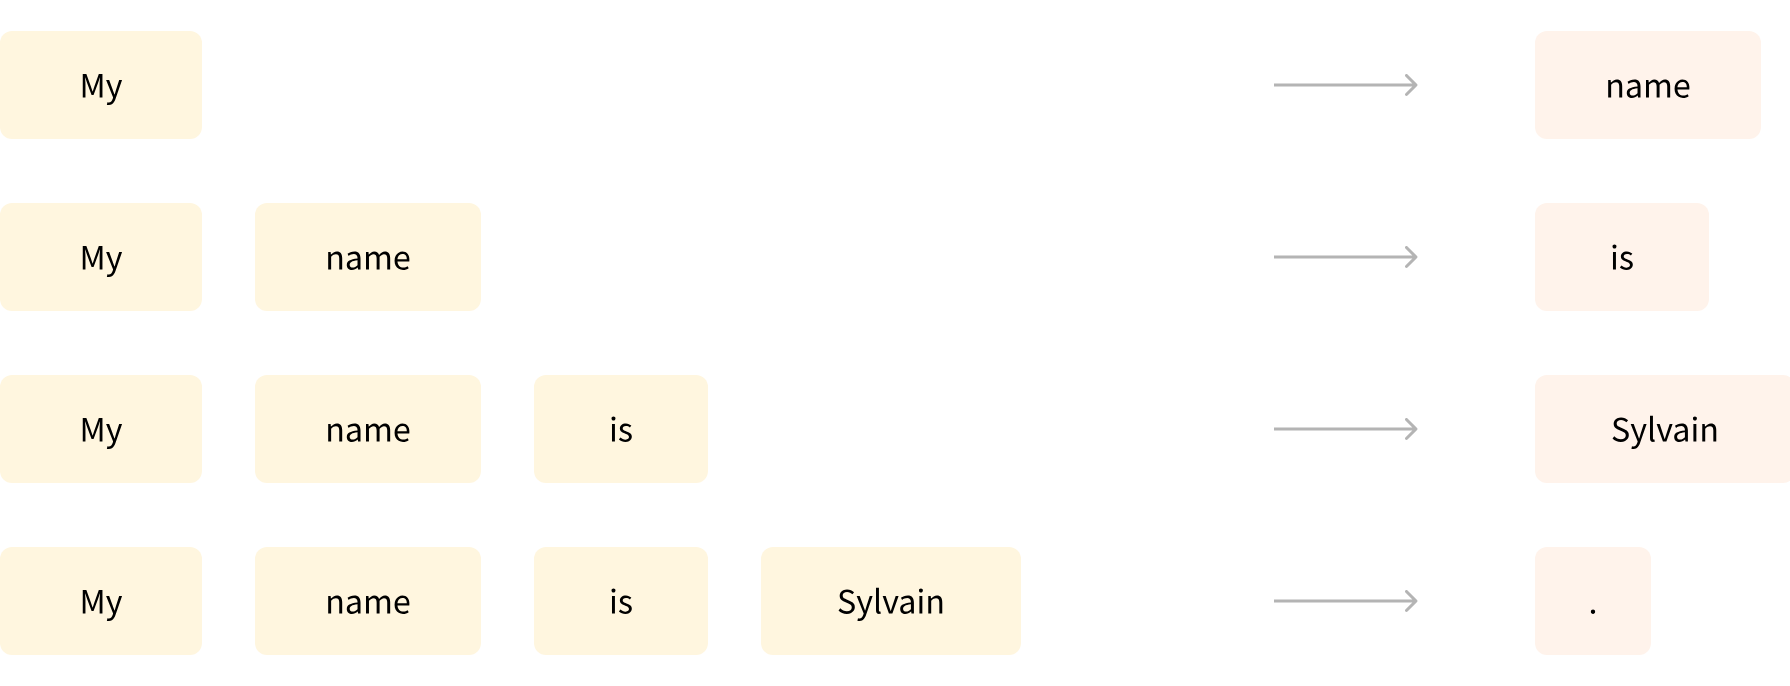

# Pretraining

Pretraining trains a model from scratch

Random initialized weights

No prior knowledge

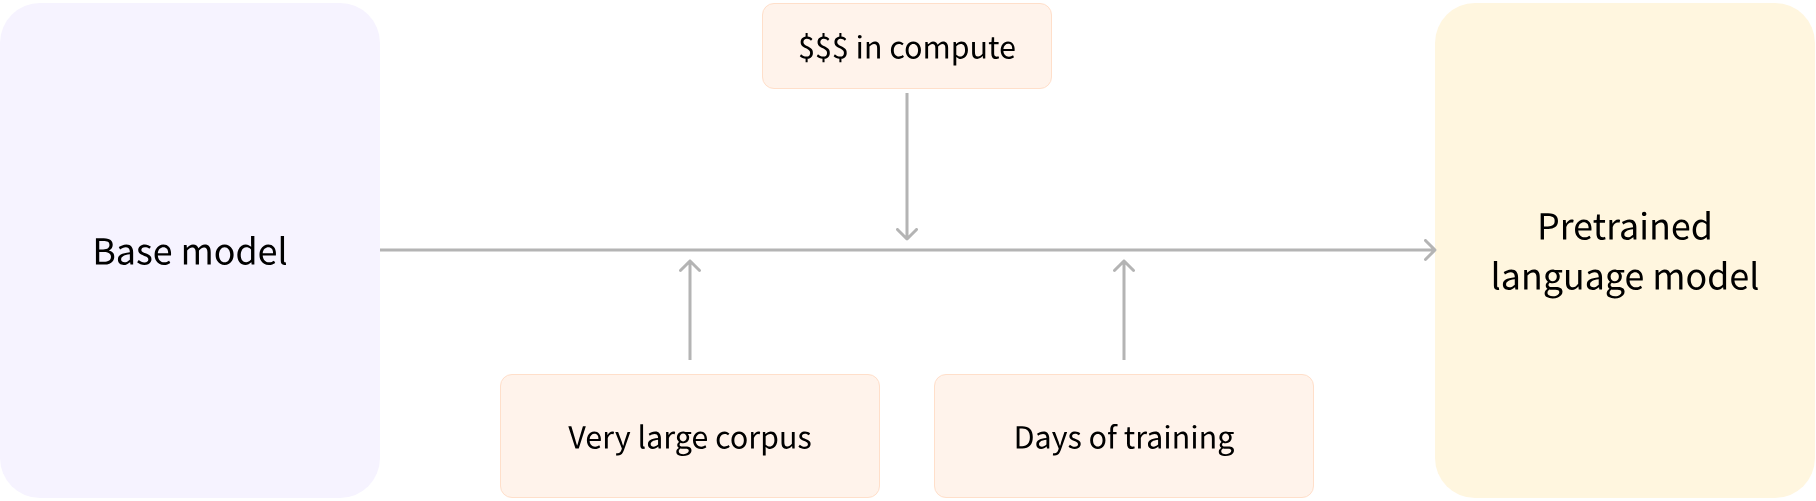

# Fine-tuning

After pretraining

Take a model and do some more training.

Why not train model for final use case?

- The pretrained model should have some general understanding of a language
- Fine-tuning requires less data than pretraining
- So, the time and resource requirements should be far lower

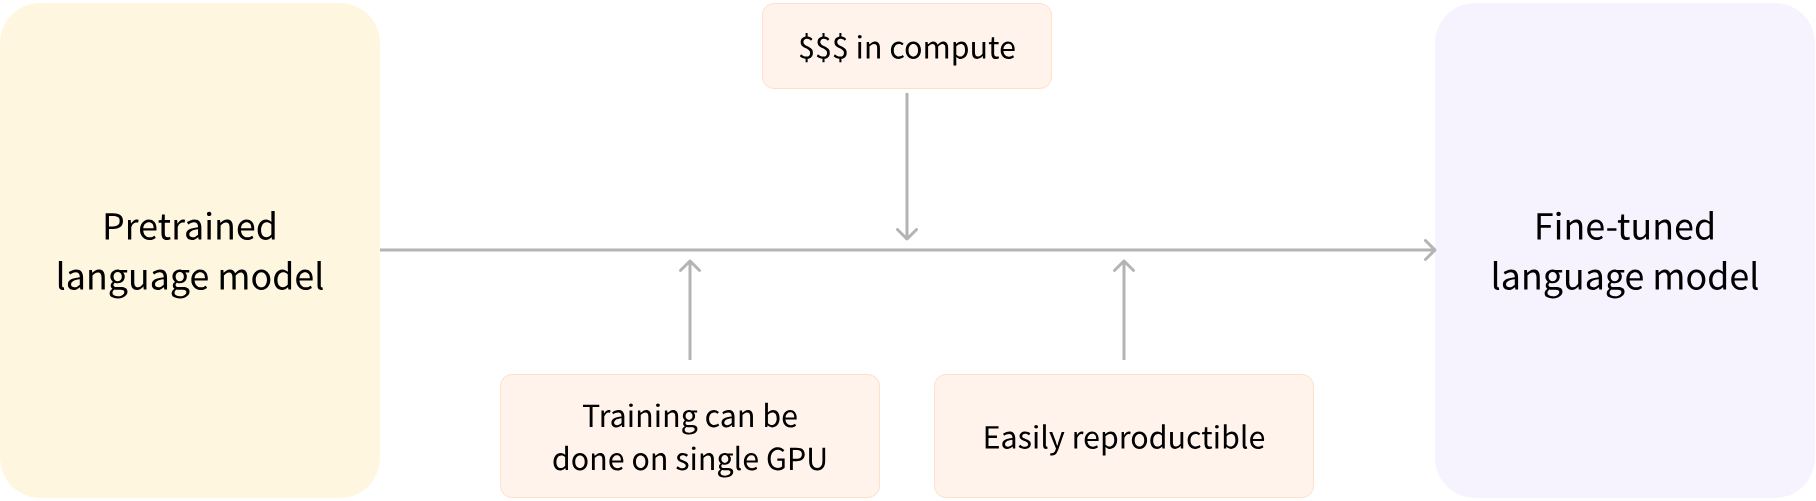

# General Transformer Architecture

Encoder - receives input and builds a feature representation

Decoder - Uses encoders representation to generate a target sequence (outputs)

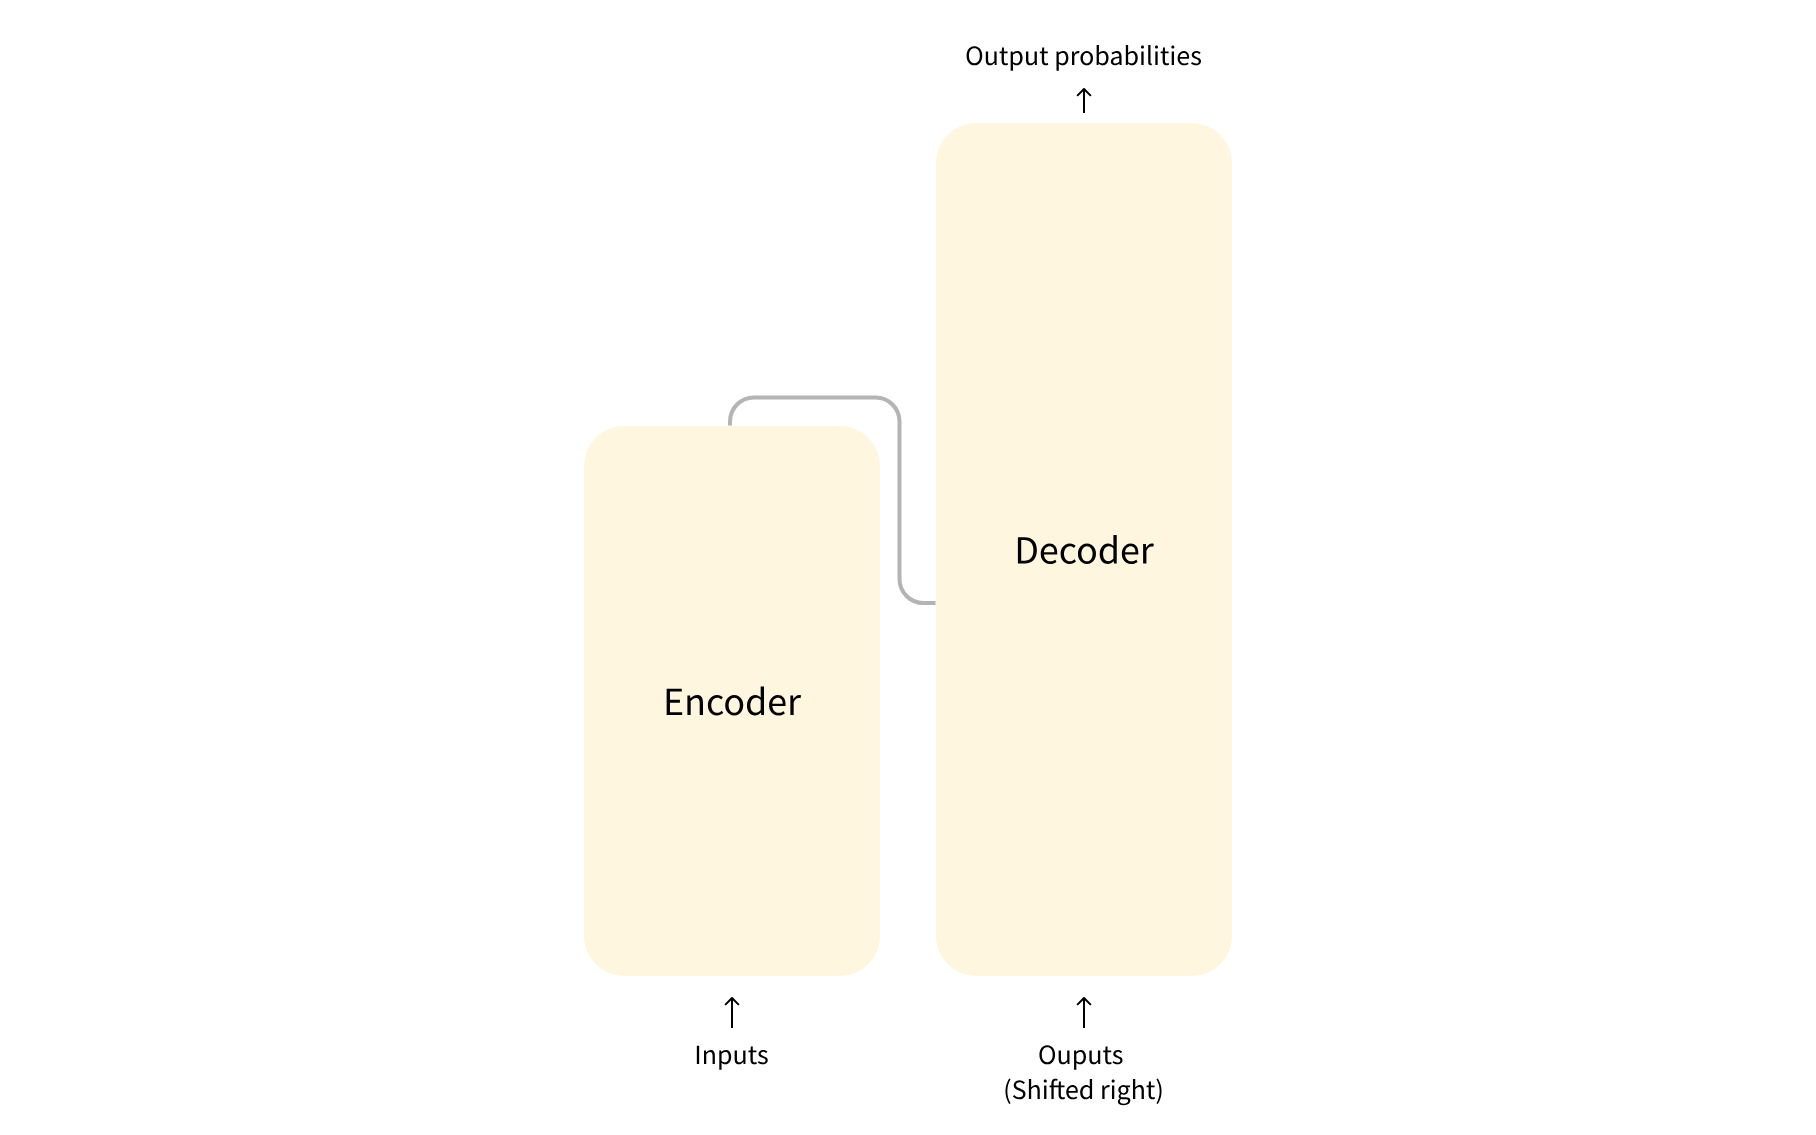

Encoder-only models - good for understanding and classifying an input

Decoder-only models - good for generative tasks such as text generation

Encoder-decoder (sequence-to-sequence) models) - good for generative tasks requiring input like translation

# Attention

Layers

Focus on specific words

Thinking about the context e.g in translation certain word sequences help in the translation of words

# Original Transformer Architecture

Designed for translation

Encoder Input: sentences, pays attention to all words

Decoder input: sentences in target language, works sequentially, pays attention to already translated words

Training sped up by feeding the decoder the whole target

Can't use future words

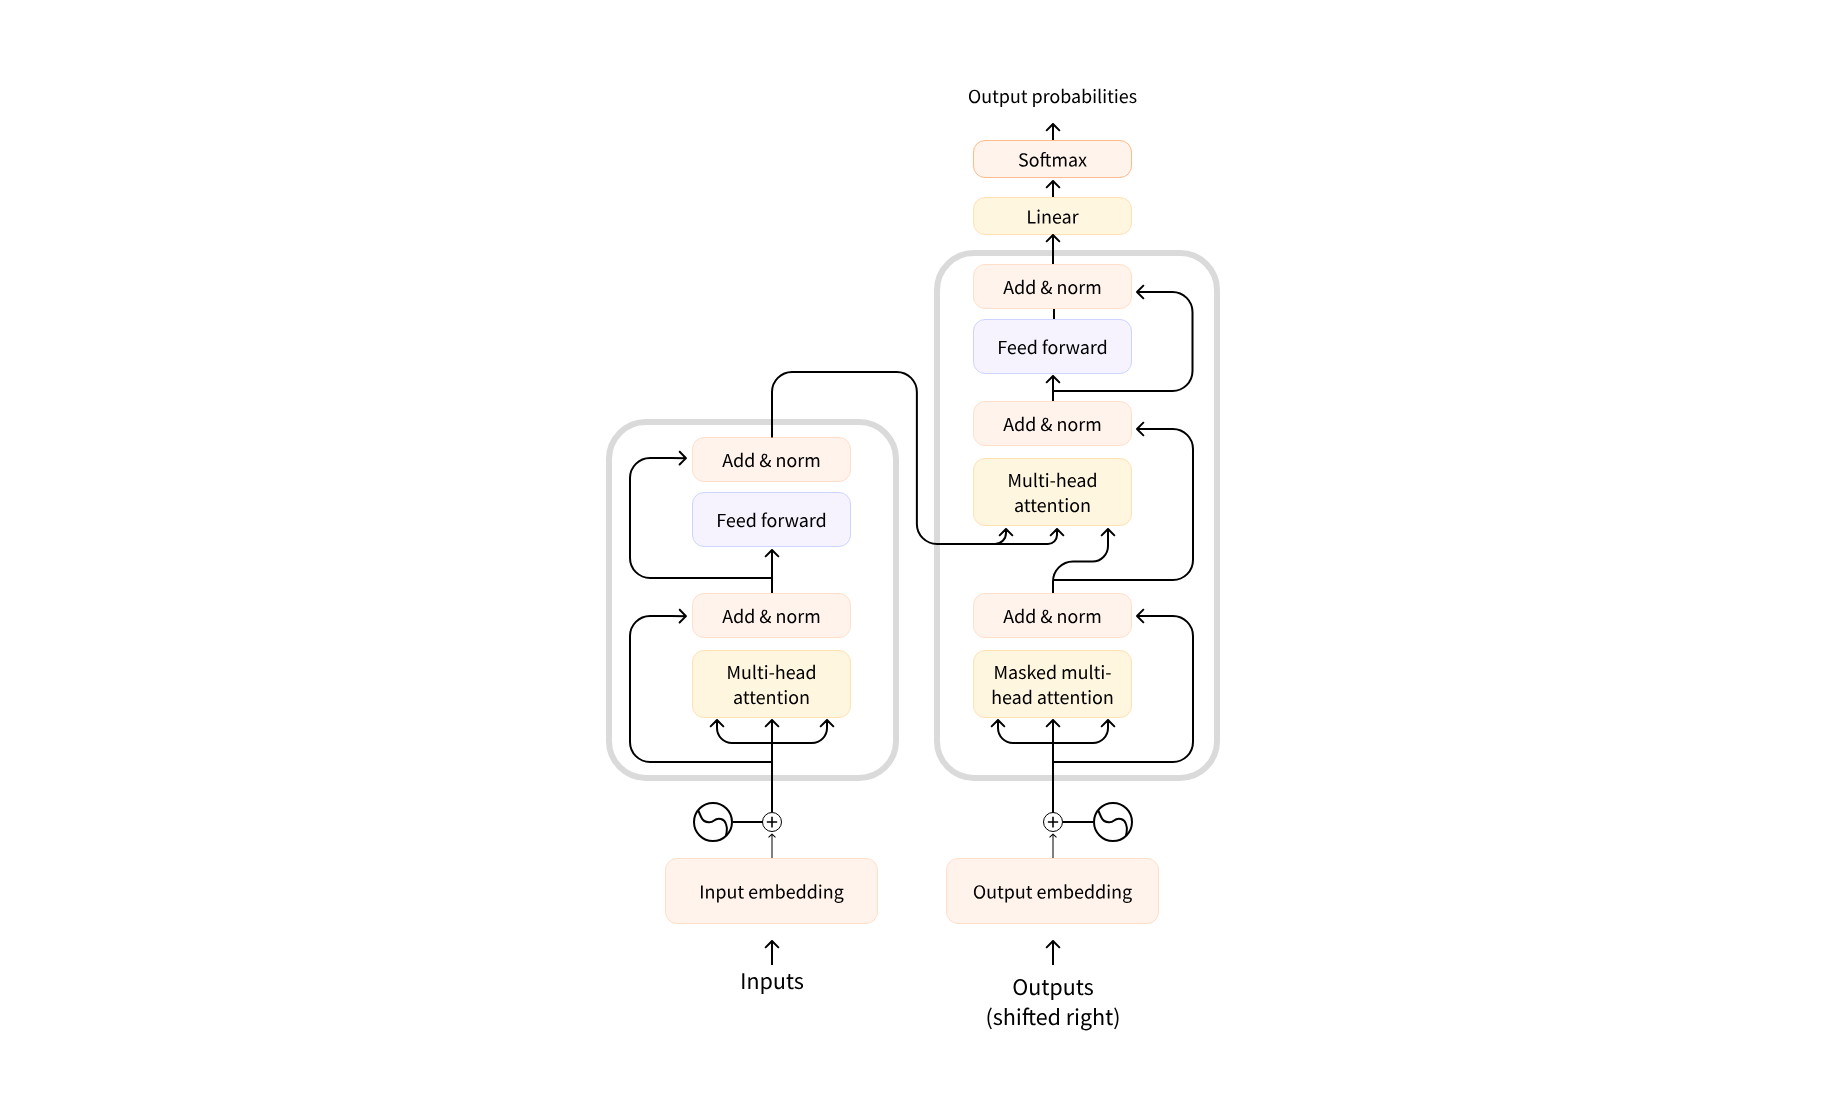

# Encoder only models

Attention layers can access all words in input

Often bi-directional (auto-encoding models)

Pretraining revolves around masked words and finding the correct word

Great for tasks requiring understanding of full sentence

BERT, DistilBERT, RoBERTa

# Decoder only models

At each stage for a word the attention layer can only access previous words

Auto-regressive model

Pretraining revolves around prediction of next work.

GPT, GPT-2

# Sequence-to-sequence models

Combines both previous models

Pretraining uses both objectives of the previous models

e.g replace random text spans with a mask and predict entire text that the mask replaces

BART, T5

# Working with pipelines

The most basic object in the 🤗 Transformers library is the `pipeline()` function. 

Connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

# Sentiment Analysis:

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

# Passing several sentences:

In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I love this so much!", "It's the end of term, hooray!"]
)

This pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English.

The model is downloaded and cached when you create the `classifier` object. 

Main steps:
1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

# Behind the pipeline

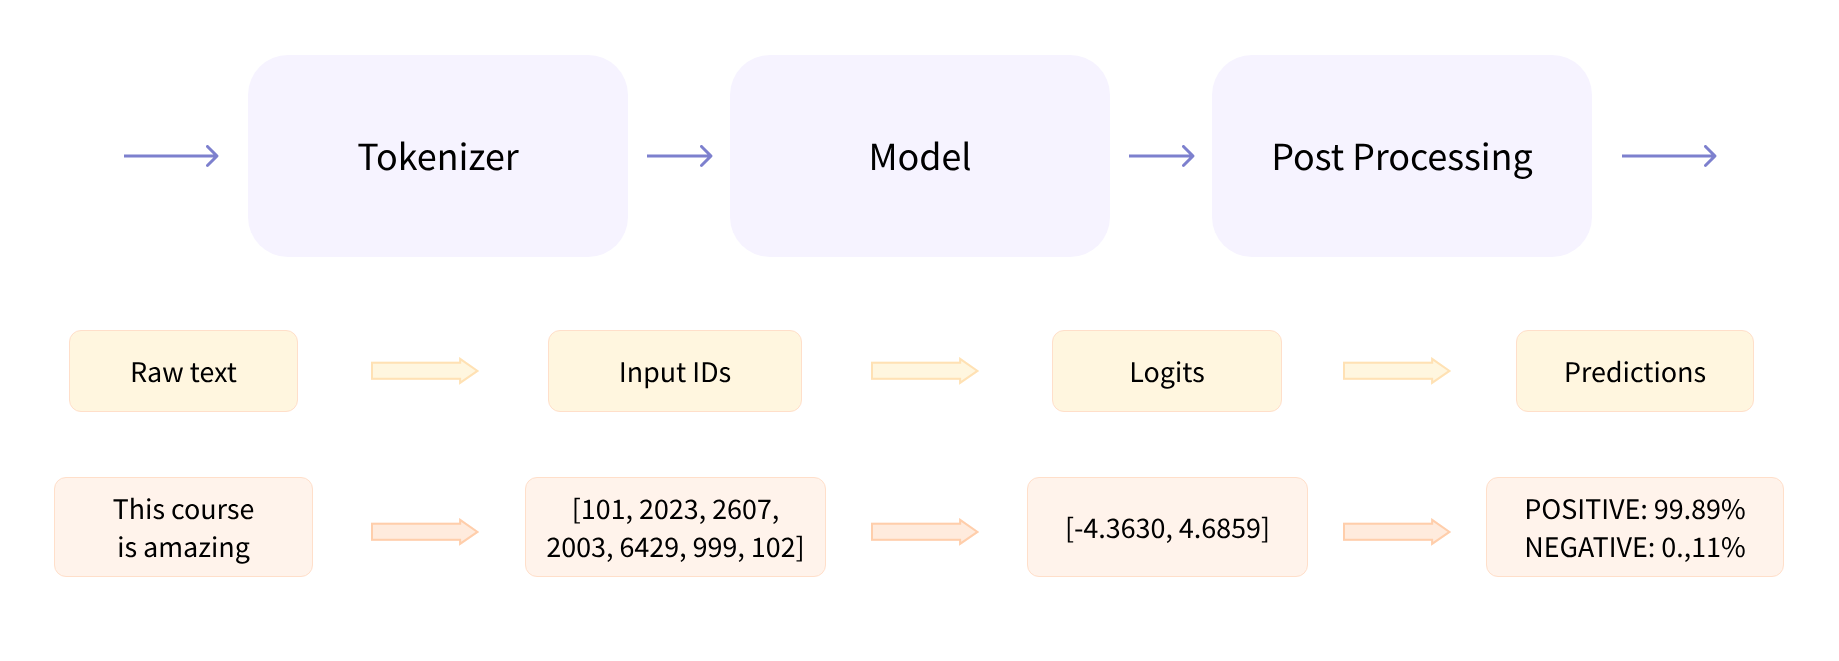

# More examples of pipelines

# Zero-shot classification

Classifying texts that haven't been labelled.

Common scenario in real world projects

Annotating text is time-consuming and requires domain knowledge

Specify labels for classification using pre-trained model

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
classifier(
    "This is a lecture about the Transformers library",
    candidate_labels=["education", "politics", "business", "programming"],
)

This is *zero-shot* because you don't need to fine-tune the model on your data.

Directly returns probability scores for any list of labels

# Text Generation

Provide a prompt

Model auto-completes by generating the remaining text

Involves randomness, so won't always get the same results

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")
generator("In this course, we will teach you how to")

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

# Mask filling

Fill in the blanks

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

# Named entity recognition

Model finds parts of input text corresponding to entities:

- people
- locations
- organisations

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

 `grouped_entities=True` tells the pipeline to reqgroup together the parts of the sentence that correspond to the same entity e.g Hugging and Face

# Question answering

Answers questions using information from a given context

N.B this extracts information from the provided context - not generating an answer

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

# Summarization

Reducing text into a shorter text

Attempts to maintatin important aspects referenced in the text

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

# Translation

Uses a default model if you provide a language pair in the task name

e.g `translation_en_to_fr`

Lots of models to choose from on Model Hub

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

# Bias and Limitations

Where does the data come from to pretrain?

The best and the worst of the internet

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

Interesting to note the vocations

Also, BERT is not trained on scraped internet data

Trained on English Wikipedia and BookCorpus datasets

So, keep in mind the biases of the original models, even when fine-tuning

# Summary

How to approach different NLP tasks using the high-level `pipeline()` function from 🤗 Transformers. 

How Transformer models work at a high level

Importance of transfer learning and fine-tuning. 

You can use the full architecture or only the encoder or decoder, depending on what kind of task you aim to solve

Lab:

Complete quiz